## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings

from annotations import *
from utils.data.data_augmentation import *
from utils.data.data_ops import move_val_split_to_train
from utils.input_output.io import load_np_arrays, load_images
from utils.input_output.io import load_gt_counts
from utils.visualization.vis import plot_aug4

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. ShanghaiTech (Part b) Dataset

In [4]:
DATASET_NAME = 'shanghai_tech/part_b'
DATASET_PATH = f'../../datasets/{DATASET_NAME}'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_COUNTS_PATH = f'{TRAIN_PATH}/gt_counts'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'

VAL_PATH = f'{DATASET_PATH}/val'

TEST_PATH = f'{DATASET_PATH}/test'
TEST_IMG_PATH = f'{TEST_PATH}/images'
TEST_GT_DOTS_PATH = f'{TEST_PATH}/gt_dots'
TEST_GT_COUNTS_PATH = f'{TEST_PATH}/gt_counts'
TEST_GT_DENSITY_MAPS_PATH = f'{TEST_PATH}/gt_density_maps'

In [5]:
#move_val_split_to_train(VAL_PATH, TRAIN_PATH)

In [6]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../../datasets/shanghai_tech/part_b
['test', 'train', 'val']


In [7]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../../datasets/shanghai_tech/part_b/train
['gt_counts', 'gt_density_maps', 'gt_dots', 'gt_dots_mat', 'images']


In [8]:
train_img_names = sorted(os.listdir(TRAIN_IMG_PATH))
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_img_names = sorted(os.listdir(TEST_IMG_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(f'train split: {len(train_img_names)} images')
print(train_img_names[:3])
print(train_dots_names[:3])

print(f'\ntest split: {len(test_img_names)} images')
print(test_img_names[:3])
print(test_dots_names[:3])

train split: 320 images
['IMG_1.jpg', 'IMG_10.jpg', 'IMG_100.jpg']
['IMG_1.png', 'IMG_10.png', 'IMG_100.png']

test split: 316 images
['IMG_1.jpg', 'IMG_10.jpg', 'IMG_100.jpg']
['IMG_1.png', 'IMG_10.png', 'IMG_100.png']


In [9]:
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(TRAIN_GT_DOTS_PATH)
print(train_dots_names[:5])

print(TEST_GT_DOTS_PATH)
print(test_dots_names[:5])

../../datasets/shanghai_tech/part_b/train/gt_dots
['IMG_1.png', 'IMG_10.png', 'IMG_100.png', 'IMG_103.png', 'IMG_104.png']
../../datasets/shanghai_tech/part_b/test/gt_dots
['IMG_1.png', 'IMG_10.png', 'IMG_100.png', 'IMG_101.png', 'IMG_102.png']


#### Load some train images and density maps

In [10]:
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=10)
print(len(train_images))
print(train_images[0].dtype)
print(train_images[0].min(), train_images[0].max())

10
float64
0.0 1.0


In [11]:
train_gt_density_maps = load_np_arrays(TRAIN_GT_DENSITY_MAPS_PATH, num=10)
print(len(train_gt_density_maps))
print(train_gt_density_maps.dtype)

10
float64


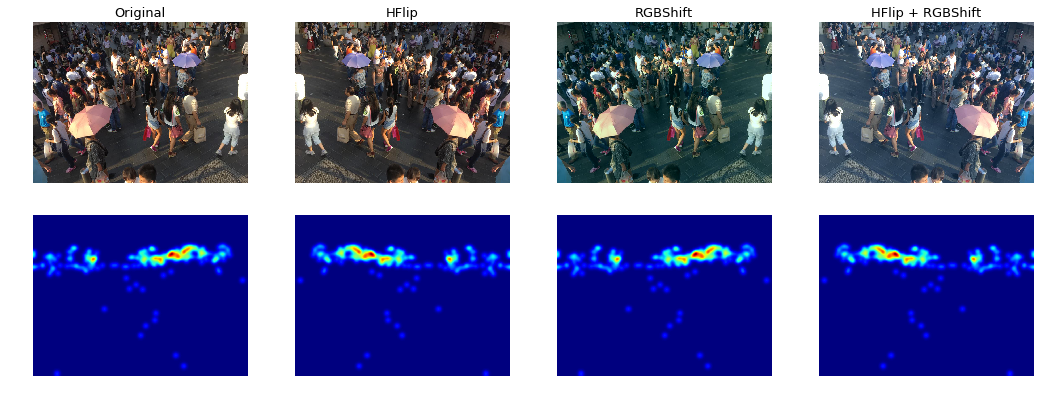

In [12]:
for i in [8]:
    img = train_images[i]
    mask = train_gt_density_maps[i]
    img_name = train_img_names[i]
    
    aug_list1 = hflip(img, mask)    
    aug_list2 = rgb_shift(aug_list1, rseed=9001)
    
    plot_aug4(aug_list1 + aug_list2)

In [ ]:
SAVE_PATH = './aug_dir'
augment4_from_dir_and_save(in_path=TRAIN_PATH,
                           save_path=SAVE_PATH,
                           rseed=9001)